<a href="https://colab.research.google.com/github/DarshanP20/SportsBettingDissertation/blob/main/dissertation_SB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kaggle Import**

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload() # Upload Kaggle API
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hugomathien/soccer

Saving kaggle.json to kaggle.json
 98% 32.0M/32.7M [00:00<00:00, 58.8MB/s]
100% 32.7M/32.7M [00:00<00:00, 94.1MB/s]


In [2]:
!unzip soccer.zip && rm soccer.zip
# !gunzip /content/*.csv.gz

Archive:  soccer.zip
  inflating: database.sqlite         


## ***Import Libararies***

In [2]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

## **Start of Program**

## **Data Visualisation**

### Betting model

In [41]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
# selectBets =("SELECT home_team_goal, away_team_goal, "
# "B365H, B365D, B365A, BWH, BWD, BWA, IWH, "
# "IWD, IWA, LBH, LBD, LBA, PSH, PSD, PSA, WHH, WHD, WHA, SJH, SJD, SJA, VCH, VCD, "
# "VCA, GBH, GBD, GBA, BSH,  BSD, BSA from Match")
selectScore = "SELECT home_team_goal, away_team_goal, "
fromMatch = "from Match"
bookieHome = "B365H, BWH, IWH, LBH, PSH, WHH, SJH, VCH, GBH, BSH "
bookieAway = "B365A, BWA, IWA, LBA, PSA, WHA, SJA, VCA, GBA, BSA "
bookieDraw = "B365D, BWD, IWD, LBD, PSD, WHD, SJD, VCD, GBD, BSD "
dfDraw = pd.read_sql_query(selectScore + bookieDraw + fromMatch, con)
dfHome = pd.read_sql_query(selectScore + bookieHome + fromMatch, con)
dfAway = pd.read_sql_query(selectScore + bookieAway + fromMatch, con)

# Verify that result of SQL query is stored in the dataframe
#print(df)

con.close()
# Odds evaluation as a predictor market?
# Select and average out odds...

In [ ]:
# print(dfAway.away_team_goal.value_counts())
# Remove rows with less than 3 odds
dfAway = dfAway[(dfAway.isnull().sum(axis=1)) < 3]
# Result 1 = Bets were successful (Away Team win), else result = 0
dfAway['result'] = np.where(dfAway.home_team_goal < dfAway.away_team_goal,1,0)
# Create average of odds
dfAway['odds_average'] = dfAway[["B365A", "BWA", "IWA", "LBA", "PSA", "WHA", "SJA", "VCA", "GBA", "BSA"]].mean(axis=1)
# Sort by Lowest odds average to highest
dfAway = dfAway.sort_values(by=['odds_average'], ascending=False)
dfAway['probability'] = dfAway['odds_average'].pow(-1)#.round(2)
print (dfAway)
"""
## Iterate through DF and check its BIN
## Then for each BIN adjust the bet odds mean
## AND adjust the correct prediction mean
"""
# 80 Bins with step 0.0125 inc 1 & 0
bins = np.arange(0.0125, 1.0125, 0.0125)
binC  = np.repeat(np.zeros(2)[np.newaxis,:], 80, axis=0)
for index, row in dfAway.iterrows():
  for idx, j in enumerate(bins):
    if (row['probability'] <= j):
      binC[idx][0] = binC[idx][0] + 1 # Count total games
      #binC[idx][0] = ((binC[idx][0] + row['probability']) / binC[idx][2]) # Assumed probability
      binC[idx][1] = binC[idx][1] + row['result'] # Count games won
      break


[       nan        nan 0.         0.03174603 0.01234568 0.04230769
 0.05202312 0.08430233 0.04899135 0.11165049 0.12093023 0.12345679
 0.1322314  0.1300813  0.16666667 0.1978022  0.20556745 0.19583333
 0.17374517 0.22437137 0.22056385 0.22380952 0.24817518 0.22108346
 0.27768595 0.28698752 0.2654424  0.33150183 0.30612245 0.37744035
 0.31231231 0.37704918 0.40524781 0.40967742 0.40925267 0.36398467
 0.44711538 0.45933014 0.45604396 0.45294118 0.53076923 0.52755906
 0.49122807 0.52083333 0.512      0.54954955 0.5        0.65289256
 0.61261261 0.54545455 0.66386555 0.67676768 0.61111111 0.57575758
 0.64788732 0.58227848 0.68421053 0.67692308 0.76923077 0.74509804
 0.71052632 0.77142857 0.75675676 0.83870968 0.72       0.85
 0.45454545 0.4        0.875      1.         1.                nan
 1.                nan        nan        nan        nan        nan
        nan        nan]


[0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125 0.125
 0.1375 0.15   0.1625 0.175  0.1875 0.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(0.0, 1.0)

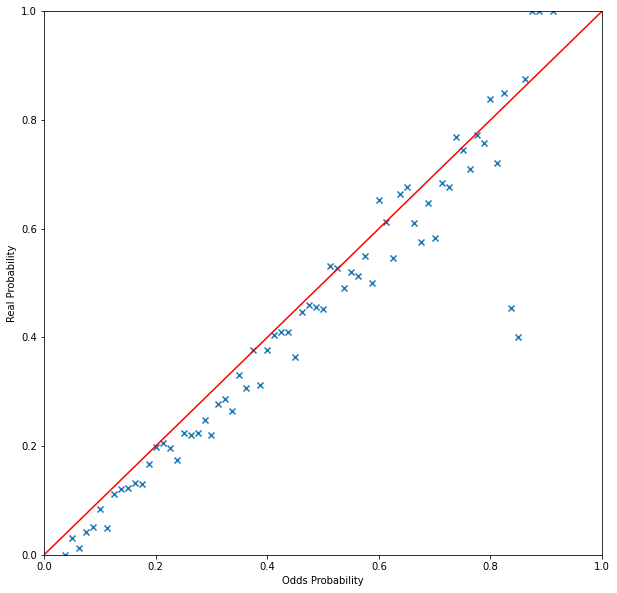

In [178]:
# (Total Games, Games won)
print (np.divide(binC.T[1], binC.T[0]))
print ("\n")
print (bins)
print ("\n")
# plt.plot(bins, binC[0])
# print (np.divide(binC.T[0], binC.T[1]))
# plt.scatter(np.divide(binC.T[1], binC.T[0]), bins, marker = 'x')
# plt.xlabel("x axis caption")

fig, ax = plt.subplots(figsize=(10, 10))
print (type(ax))
ax.scatter(bins, np.divide(binC.T[1], binC.T[0]),marker = 'x')
ax.plot([1,0],[1,0],color='red')
ax.set_ylabel('Real Probability')
ax.set_xlabel('Odds Probability')
ax.set_xlim(xmin=0,xmax=1)
ax.set_ylim(ymin=0,ymax=1)

In [ ]:
# # TODO:
# Check for why there are outliers
# Set minimum for each bin (SO it doesnt have any y = 1)
# Analyse for if your graph works
# DO the same for Home and Draw
# Then create a stats table with analysis of the data e.g. Mean, Median ...


### "Betting Strategy'